In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

## **Initial Step : Reading the data**

In [2]:
import pandas as pd
df=pd.read_csv("daily_offers.csv") 

In [3]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [4]:
df.shape 

(181673, 14)

In [5]:
df.nunique()

id               181671
item_date           252
quantity tons    181673
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      16563
product_ref          33
delivery date        28
selling_price      9795
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [7]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [8]:
#df = df.drop(columns = ['id','item_date','delivery date','material_ref'])

In [9]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


## item_date

In [10]:
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce')

In [11]:
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce')

In [12]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,2020-07-01,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,2020-07-01,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,2020-07-01,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,2020-07-01,601.00


In [13]:
df['item_date'].dtype

dtype('<M8[ns]')

## quantity tons

In [14]:
df['quantity tons'].unique()

array([54.15113862, 768.0248392, 386.1279489, ..., '4.235593568', '-2000',
       '406.6865384'], dtype=object)

In [15]:
df['quantity tons'].nunique()

181673

In [16]:
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')

In [17]:
df['quantity tons'].dtype

dtype('float64')

In [18]:
df['quantity tons'].isnull().sum()

1

In [19]:
df = df.dropna(subset = ['quantity tons']) 

In [20]:
df['quantity tons'].min()

-2000.0

In [21]:
df['quantity tons'].max()

1000000000.0

In [22]:
df['quantity tons'].describe()

count    1.816720e+05
mean     5.874926e+03
std      2.349081e+06
min     -2.000000e+03
25%      1.097030e+01
50%      3.036464e+01
75%      6.716061e+01
max      1.000000e+09
Name: quantity tons, dtype: float64

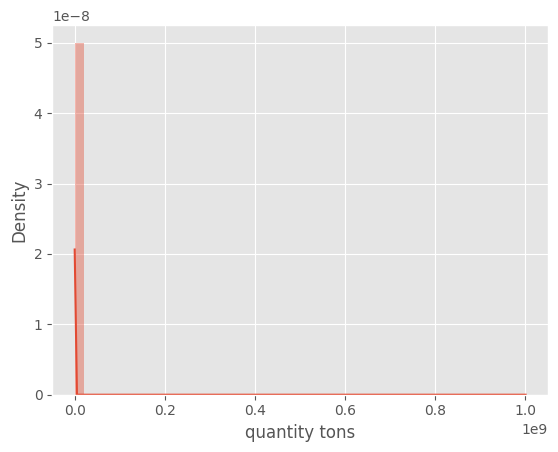

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['quantity tons'])                       # skewed
plt.show()

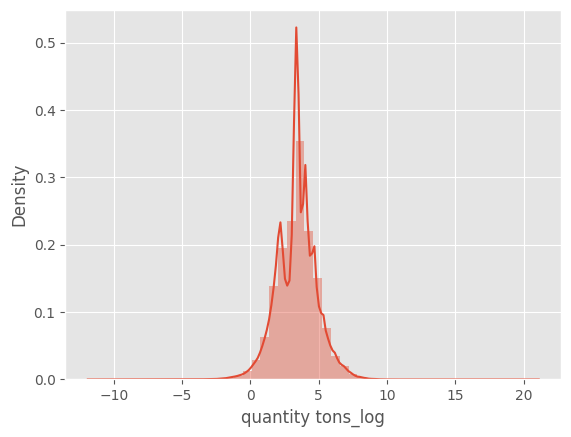

In [24]:
df['quantity tons_log'] = np.log(df['quantity tons'])
sns.distplot(df['quantity tons_log'])
plt.show()

In [25]:
df['quantity tons_log'].dtype

dtype('float64')

In [26]:
df = df.drop(columns = ['quantity tons'])

In [27]:
df

,id,item_date,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.00,6.643822
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,5.956169
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,5.310301
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.666354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,2020-07-01,591.00,4.629691
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,2020-07-01,589.00,5.337954
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,2020-07-01,619.00,1.443523
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,2020-07-01,601.00,NaN


In [28]:
df['quantity tons_log'].isnull().sum()

4

In [29]:
df = df.dropna(subset = ['quantity tons_log']) 

## customer

In [30]:
print(df['customer'].nunique())
print(df['customer'].dtype)
df['customer'].unique()

1169
float64


array([30156308., 30202938., 30153963., ..., 30349515., 30284694.,
       30161559.])

In [31]:
df['customer'].unique()

array([30156308., 30202938., 30153963., ..., 30349515., 30284694.,
       30161559.])

In [32]:
df['customer'].dtype

dtype('float64')

In [33]:
df['customer'].isnull().sum()

1

In [34]:
df = df.dropna(subset = ['customer']) 

In [35]:
df

,id,item_date,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.00,6.643822
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,5.956169
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,5.310301
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.666354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,30200854.0,25.0,Won,W,41.0,0.96,1240.0,0000000000000000000000000000000001000222,164141591,2020-07-01,602.00,4.670802
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,2020-07-01,591.00,4.629691
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,2020-07-01,589.00,5.337954
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,2020-07-01,619.00,1.443523


## Country

In [36]:
df.country.nunique()

17

In [37]:
df.country.value_counts()

78.0     32083
26.0     27516
25.0     23360
27.0     21509
32.0     18658
28.0     15824
84.0     12776
77.0      9714
30.0      8702
39.0      3730
79.0      2742
38.0      1712
40.0      1683
80.0       819
113.0      714
89.0        92
107.0        5
Name: country, dtype: int64

In [38]:
df.country.isnull().sum()

28

In [39]:
df.country.mode()

0    78.0
Name: country, dtype: float64

In [40]:
df.country.mode()[0]

78.0

In [41]:
df.country = df.country.fillna(df.country.mode()[0])

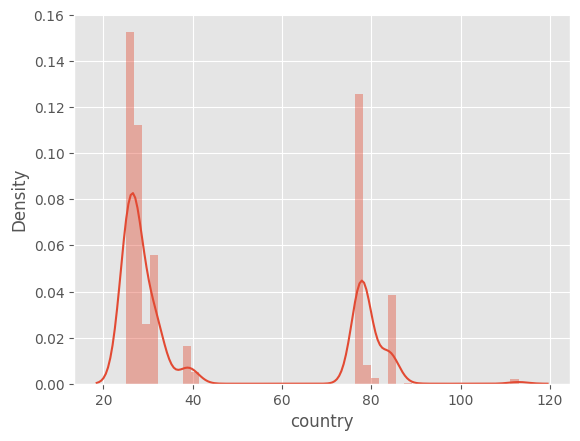

In [42]:
sns.distplot(df['country'])
plt.show()                                # not skewed

## material_ref

In [43]:
df.material_ref.unique()

array(['DEQ1 S460MC', '0000000000000000000000000000000000104991',
       'S0380700', ..., 'MAS65550', '4.11043_1060X5_BRE',
       '202006170005.IO.1.1'], dtype=object)

In [44]:
df.material_ref.nunique()

16562

In [45]:
df.material_ref.value_counts()

DX51D+Z                                     922
G9010                                       856
DC01 RED.FLAT KUCHNIA EKO 2.2               777
DC01                                        725
G9006                                       671
                                           ... 
0000000000000000000000000000000003050080      1
0000000000000000000000000000000004001568      1
0000000000000000000000000000000003016460      1
0000000000000000000000000000000003016459      1
202006170005.IO.1.1                           1
Name: material_ref, Length: 16562, dtype: int64

In [46]:
df['material_ref'] = df['material_ref'].str.lstrip('0')

In [47]:
df.material_ref.isnull().sum()

77916

In [48]:
df['material_ref'].fillna('unknown', inplace=True)

In [49]:
df.material_ref.value_counts()

unknown                          77916
DX51D+Z                            922
G9010                              856
DC01 RED.FLAT KUCHNIA EKO 2.2      777
DC01                               725
                                 ...  
3050080                              1
4001568                              1
3016460                              1
3016459                              1
202006170005.IO.1.1                  1
Name: material_ref, Length: 16562, dtype: int64

In [50]:
df.material_ref.dtype

dtype('O')

In [51]:
df

,id,item_date,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.643822
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,5.956169
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,5.310301
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.666354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,30200854.0,25.0,Won,W,41.0,0.96,1240.0,1000222,164141591,2020-07-01,602.00,4.670802
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00,4.629691
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00,5.337954
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00,1.443523


## product_ref

In [52]:
df.product_ref.unique()

array([1670798778, 1668701718,     628377,     640665,     611993,
       1668701376,  164141591, 1671863738, 1332077137,     640405,
       1693867550, 1665572374, 1282007633, 1668701698,     628117,
       1690738206,     628112,     640400, 1671876026,  164336407,
        164337175, 1668701725, 1665572032,     611728, 1721130331,
       1693867563,     611733, 1690738219, 1722207579,  929423819,
       1665584320, 1665584662, 1665584642])

In [53]:
df.product_ref.nunique()

33

In [54]:
df.product_ref.dtype

dtype('int64')

In [55]:
df.product_ref.astype('str')

0         1670798778
1         1668701718
2             628377
3         1668701718
4             640665
             ...    
181667     164141591
181668     164141591
181669     164141591
181670     164141591
181672     164141591
Name: product_ref, Length: 181667, dtype: object

In [56]:
df.product_ref.value_counts()

611993        45726
164141591     28782
640665        27375
1670798778    18915
628377        18574
1668701718    15284
640405         9715
1671863738     5162
1332077137     4560
1693867550     1825
1668701376     1216
1671876026      823
628117          775
164337175       653
1668701698      374
1693867563      293
1282007633      281
1721130331      257
1665572374      202
628112          177
611728          148
1690738206      147
1722207579      125
640400           83
1668701725       56
164336407        49
611733           45
1690738219       19
1665584320       12
1665572032       10
1665584642        2
929423819         1
1665584662        1
Name: product_ref, dtype: int64

In [57]:
df.product_ref.isnull().sum()

0

## item type

In [58]:
df['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [59]:
df['item type'].value_counts()

W         105611
S          69234
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: item type, dtype: int64

In [60]:
df['item type'].isnull().sum()

0

## status

In [61]:
df['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable', nan], dtype=object)

In [62]:
df['status'].value_counts()

Won                116005
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3139
Offered                53
Offerable              10
Wonderful               1
Name: status, dtype: int64

In [63]:
df['status'].isnull().sum()

2

In [64]:
df = df.dropna(subset = ['status'] ) 

## application

In [65]:
df['application'].unique()

array([10., 41., 28., 59., 15.,  4., 38., 56., 42., 26., 27., 19., 20.,
       66., 29., 22., 40., 25., 67., 79.,  3., 99.,  2.,  5., 39., 69.,
       70., 65., 58., 68., nan])

In [66]:
df['application'].nunique()

30

In [67]:
df.application.describe()

count    181641.000000
mean         25.615957
std          17.754287
min           2.000000
25%          10.000000
50%          15.000000
75%          41.000000
max          99.000000
Name: application, dtype: float64

In [68]:
df['application'].value_counts()

10.0    77540
41.0    46258
15.0    20771
59.0     8927
42.0     5858
56.0     4846
29.0     1937
27.0     1784
26.0     1650
28.0     1591
40.0     1576
25.0     1498
79.0     1422
22.0     1023
20.0      768
66.0      718
3.0       657
38.0      511
58.0      447
4.0       286
39.0      267
65.0      247
67.0      221
68.0      181
99.0      146
19.0      143
69.0      122
5.0       110
70.0      102
2.0        34
Name: application, dtype: int64

In [69]:
df['application'].isnull().sum()

24

In [70]:
df.application=df.application.fillna(df.application.median())

In [71]:
df['application'] = df['application'].astype('int64')           # From this code we come to know that there is e in the column

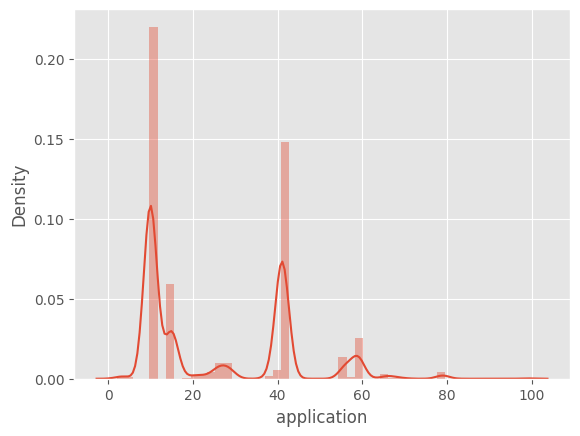

In [72]:
sns.distplot(df['application'])
plt.show()

In [73]:
df.shape

(181665, 14)

In [74]:
df

,id,item_date,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,30156308.0,28.0,Won,W,10,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,30202938.0,25.0,Won,W,41,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.643822
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,30153963.0,30.0,Won,WI,28,0.38,952.0,S0380700,628377,2021-01-01,644.33,5.956169
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,30349574.0,32.0,Won,S,59,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,5.310301
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,30211560.0,28.0,Won,W,10,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.666354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,30200854.0,25.0,Won,W,41,0.96,1240.0,1000222,164141591,2020-07-01,602.00,4.670802
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,30200854.0,25.0,Won,W,41,0.96,1220.0,1000777,164141591,2020-07-01,591.00,4.629691
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,30200854.0,25.0,Won,W,41,0.95,1500.0,1000227,164141591,2020-07-01,589.00,5.337954
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,30200854.0,25.0,Won,W,41,0.71,1250.0,1004216,164141591,2020-07-01,619.00,1.443523


## thickness

In [75]:
df['thickness'].nunique()

594

In [76]:
df['thickness'].describe()

count    181664.000000
mean          2.564891
std           6.572456
min           0.180000
25%           0.700000
50%           1.500000
75%           3.000000
max        2500.000000
Name: thickness, dtype: float64

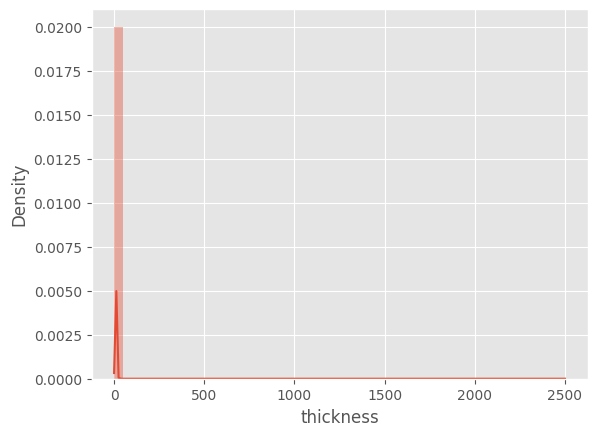

In [77]:
sns.distplot(df['thickness'])
plt.show()

In [78]:
df['thickness'].isnull().sum()

1

In [79]:
df = df.dropna(subset = ['thickness'] )    

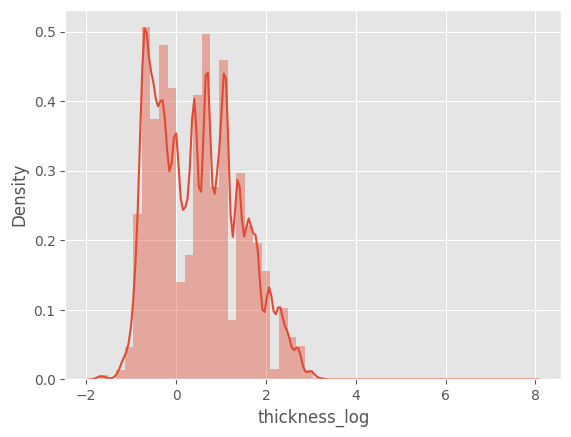

In [80]:
df['thickness_log'] = np.log(df['thickness'])
sns.distplot(df['thickness_log'])
plt.show()

In [81]:
df = df.drop(columns = ['thickness'])

In [82]:
df.shape

(181664, 14)

## width

In [83]:
df['width'].nunique()

1386

In [84]:
df['width'].describe()

count    181664.000000
mean       1295.291400
std         261.633383
min           1.000000
25%        1180.000000
50%        1250.000000
75%        1500.000000
max        2990.000000
Name: width, dtype: float64

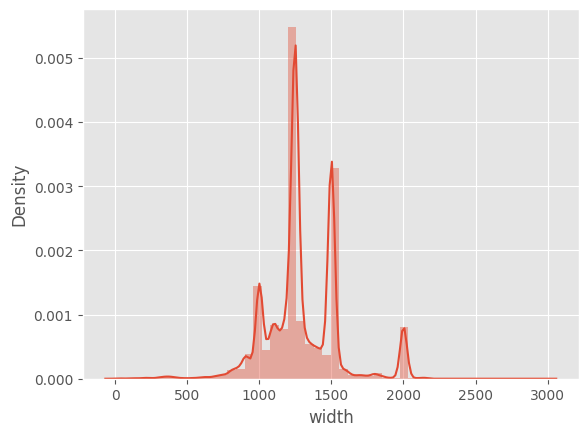

In [85]:
sns.distplot(df['width'])
plt.show()

In [86]:
df['width'].isnull().sum()

0

In [87]:
df = df.dropna(subset = ['width'] )    

In [88]:
df.shape

(181664, 14)

## selling_price

In [89]:
df['selling_price'].nunique()

9795

In [90]:
df['selling_price'].dtype

dtype('float64')

In [91]:
df['selling_price'].describe()

count    1.816630e+05
mean     1.918099e+03
std      3.318039e+05
min     -1.160000e+03
25%      6.690000e+02
50%      8.120000e+02
75%      9.530000e+02
max      1.000010e+08
Name: selling_price, dtype: float64

In [92]:
df['selling_price'].isnull().sum()

1

In [93]:
df = df.dropna(subset = ['selling_price'] )    

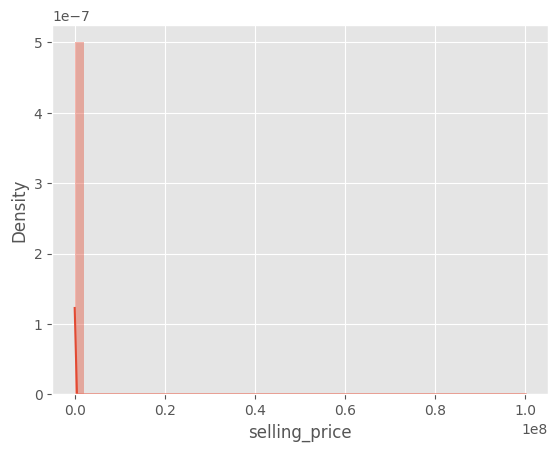

In [94]:
sns.distplot(df['selling_price'])                 # skewed 
plt.show()

In [95]:
x_value=df['selling_price'].min()
x_value

-1160.0

In [96]:
df[~(df['selling_price'] <= 0)]

,id,item_date,customer,country,status,item type,application,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,30156308.0,28.0,Won,W,10,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,30202938.0,25.0,Won,W,41,1210.0,104991,1668701718,2021-04-01,1047.00,6.643822,-0.223144
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,30153963.0,30.0,Won,WI,28,952.0,S0380700,628377,2021-01-01,644.33,5.956169,-0.967584
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,30349574.0,32.0,Won,S,59,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,5.310301,0.832909
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,30211560.0,28.0,Won,W,10,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.666354,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,30200854.0,25.0,Won,W,41,1240.0,1000222,164141591,2020-07-01,602.00,4.670802,-0.040822
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,30200854.0,25.0,Won,W,41,1220.0,1000777,164141591,2020-07-01,591.00,4.629691,-0.040822
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,30200854.0,25.0,Won,W,41,1500.0,1000227,164141591,2020-07-01,589.00,5.337954,-0.051293
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,30200854.0,25.0,Won,W,41,1250.0,1004216,164141591,2020-07-01,619.00,1.443523,-0.342490


In [97]:
df = df[~(df['selling_price'] <= 0)]

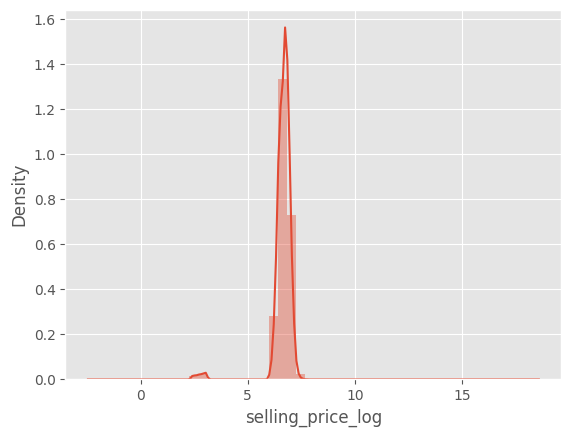

In [98]:
df['selling_price_log'] = np.log(df['selling_price'])           # log cant take '0' or negative values
sns.distplot(df['selling_price_log'])
plt.show()

In [99]:
df = df.drop(columns = ['selling_price'])

In [100]:
df.shape

(181656, 14)

In [101]:
df

,id,item_date,customer,country,status,item type,application,width,material_ref,product_ref,delivery date,quantity tons_log,thickness_log,selling_price_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,30156308.0,28.0,Won,W,10,1500.0,DEQ1 S460MC,1670798778,2021-07-01,3.991779,0.693147,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,30202938.0,25.0,Won,W,41,1210.0,104991,1668701718,2021-04-01,6.643822,-0.223144,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,30153963.0,30.0,Won,WI,28,952.0,S0380700,628377,2021-01-01,5.956169,-0.967584,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,30349574.0,32.0,Won,S,59,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,5.310301,0.832909,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,30211560.0,28.0,Won,W,10,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,30200854.0,25.0,Won,W,41,1240.0,1000222,164141591,2020-07-01,4.670802,-0.040822,6.400257
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,30200854.0,25.0,Won,W,41,1220.0,1000777,164141591,2020-07-01,4.629691,-0.040822,6.381816
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,30200854.0,25.0,Won,W,41,1500.0,1000227,164141591,2020-07-01,5.337954,-0.051293,6.378426
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,30200854.0,25.0,Won,W,41,1250.0,1004216,164141591,2020-07-01,1.443523,-0.342490,6.428105


## application

In [102]:
df['application'].unique()

array([10, 41, 28, 59, 15,  4, 38, 56, 42, 26, 27, 19, 20, 66, 29, 22, 40,
       25, 67, 79,  3, 99,  2,  5, 39, 69, 70, 65, 58, 68])

In [103]:
df['application'].describe()

count    181656.000000
mean         25.614320
std          17.753543
min           2.000000
25%          10.000000
50%          15.000000
75%          41.000000
max          99.000000
Name: application, dtype: float64

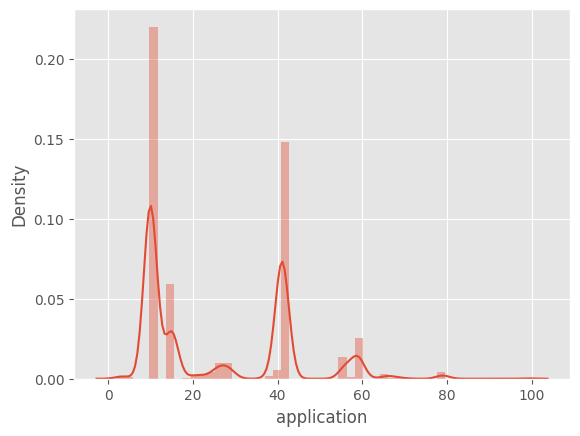

In [104]:
sns.distplot(df['application'])
plt.show()

In [105]:
df['application'].isnull().sum()

0

In [106]:
df.shape

(181656, 14)

In [107]:
df

,id,item_date,customer,country,status,item type,application,width,material_ref,product_ref,delivery date,quantity tons_log,thickness_log,selling_price_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,30156308.0,28.0,Won,W,10,1500.0,DEQ1 S460MC,1670798778,2021-07-01,3.991779,0.693147,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,30202938.0,25.0,Won,W,41,1210.0,104991,1668701718,2021-04-01,6.643822,-0.223144,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,30153963.0,30.0,Won,WI,28,952.0,S0380700,628377,2021-01-01,5.956169,-0.967584,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,30349574.0,32.0,Won,S,59,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,5.310301,0.832909,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,30211560.0,28.0,Won,W,10,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,30200854.0,25.0,Won,W,41,1240.0,1000222,164141591,2020-07-01,4.670802,-0.040822,6.400257
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,30200854.0,25.0,Won,W,41,1220.0,1000777,164141591,2020-07-01,4.629691,-0.040822,6.381816
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,30200854.0,25.0,Won,W,41,1500.0,1000227,164141591,2020-07-01,5.337954,-0.051293,6.378426
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,30200854.0,25.0,Won,W,41,1250.0,1004216,164141591,2020-07-01,1.443523,-0.342490,6.428105


In [108]:
df.isnull().sum()

id                   2
item_date            3
customer             0
country              0
status               0
item type            0
application          0
width                0
material_ref         0
product_ref          0
delivery date        3
quantity tons_log    0
thickness_log        0
selling_price_log    0
dtype: int64

In [109]:
#plt.scatter(x=df['product_ref'],y=df['selling_price'])

In [110]:
x=df[['quantity tons_log','application','thickness_log','width','selling_price_log','country','customer','product_ref']].corr()

<Axes: >

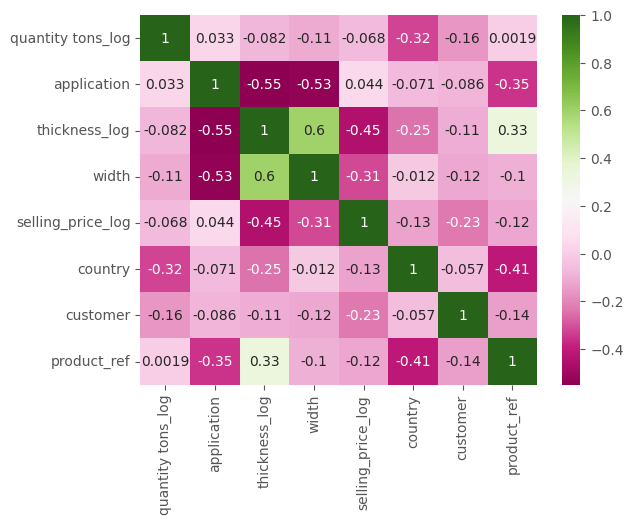

In [111]:
sns.heatmap(x.corr(), annot=True,cmap='PiYG')

In [112]:
df = df.drop(columns = ['id','item_date','delivery date','material_ref'])

In [113]:
df.isnull().sum()

customer             0
country              0
status               0
item type            0
application          0
width                0
product_ref          0
quantity tons_log    0
thickness_log        0
selling_price_log    0
dtype: int64

In [114]:
df = df.dropna()

# Selling_price_prediction

In [115]:
df.columns

Index(['customer', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'quantity tons_log', 'thickness_log',
       'selling_price_log'],
      dtype='object')

In [125]:
num_var = df[['customer', 'width','quantity tons_log', 'thickness_log','selling_price_log']]
cat_var = df[['country', 'status', 'item type', 'application', 'product_ref']]
tar_var = df[['selling_price_log']]

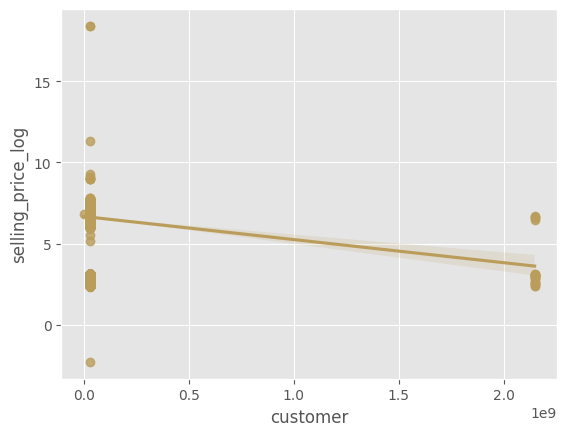

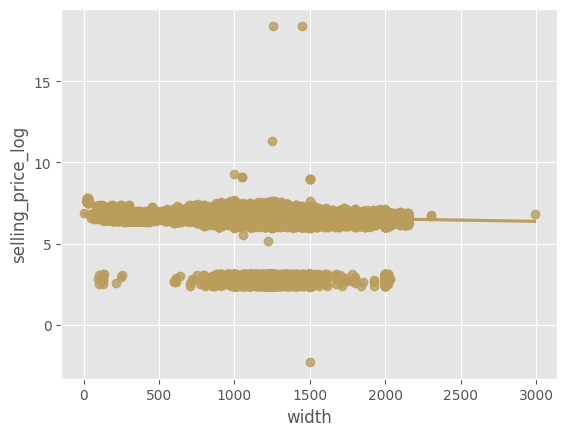

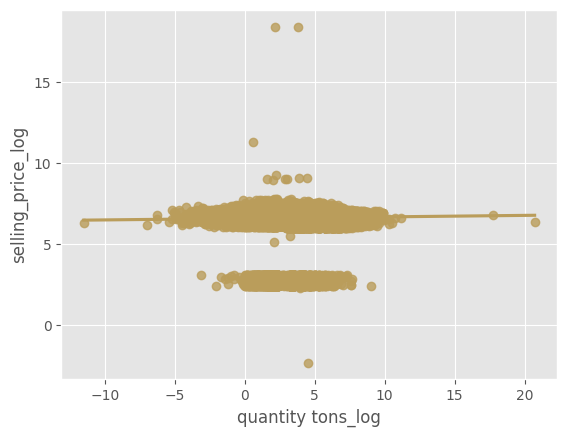

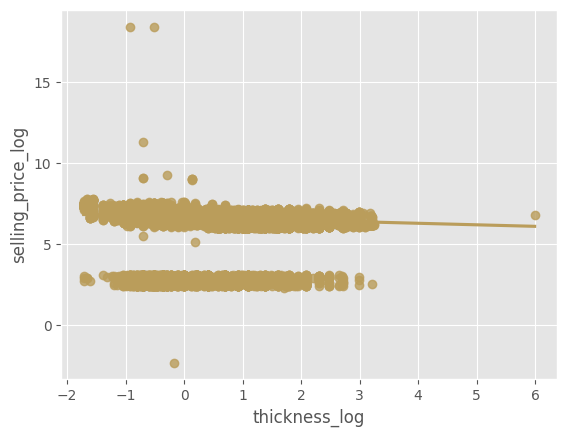

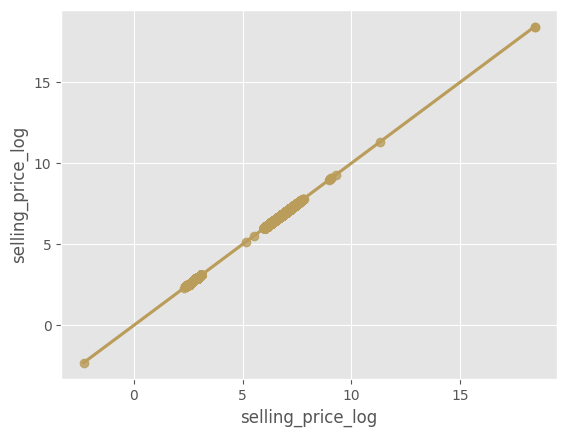

In [152]:
for i in num_var.columns:
    sns.regplot(data=df,x=i,y='selling_price_log',color='#ba9d5b')
    plt.xlabel(f'{i}')
    plt.ylabel('selling_price_log')
    plt.show()

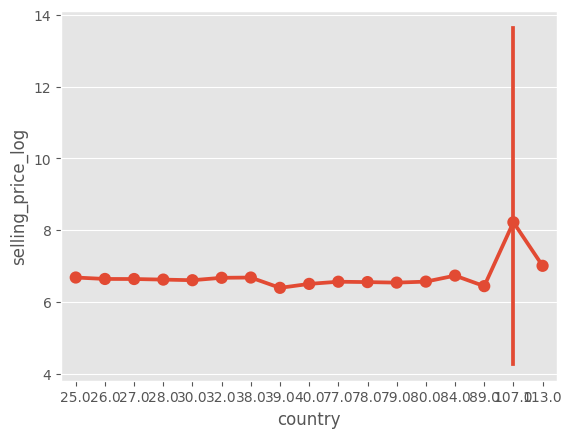

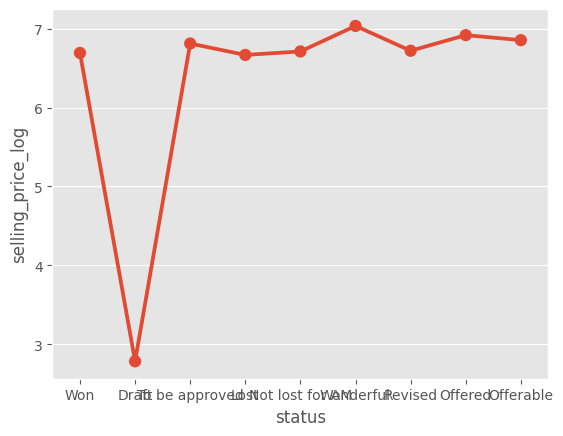

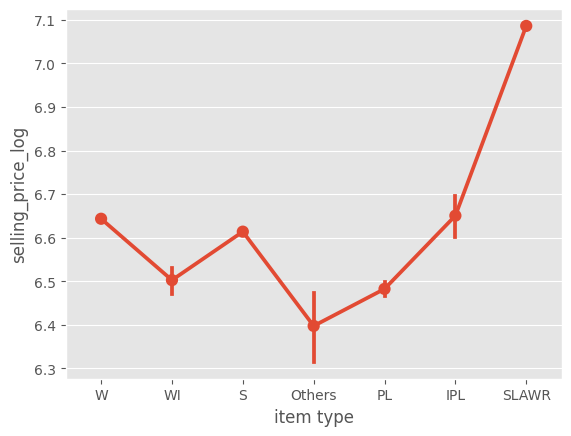

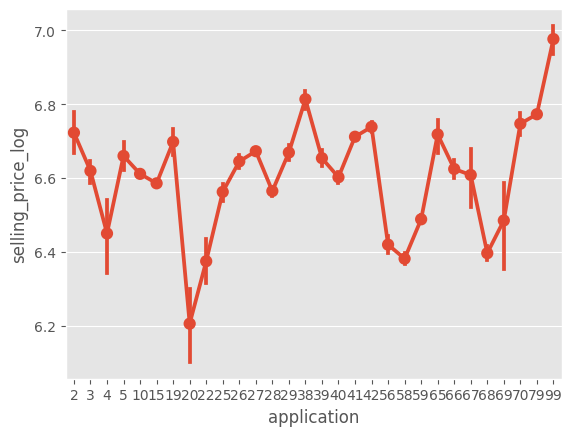

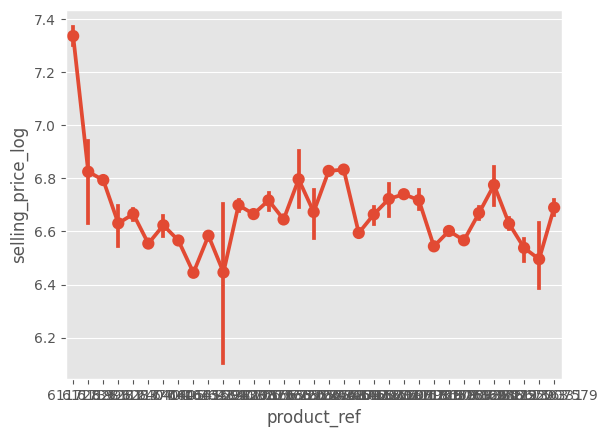

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in cat_var.columns:

    sns.pointplot(data=df,x=i, y='selling_price_log', ci=95)  # ci parameter sets the confidence interval
    plt.show()


## Encoding data

In [ ]:
dft = df

In [ ]:
dft = pd.get_dummies(dft,columns = ["item type"])
dft = pd.get_dummies(dft,columns = ["status"])
dft = pd.get_dummies(dft,columns = ["product_ref"])
dft = pd.get_dummies(dft,columns = ["application"])
dft = pd.get_dummies(dft,columns = ["country"])

In [ ]:
df

,customer,country,status,item type,application,width,product_ref,quantity tons_log,thickness_log,selling_price_log
0,30156308.0,28.0,Won,W,10,1500.0,1670798778,3.991779,0.693147,6.749931
1,30202938.0,25.0,Won,W,41,1210.0,1668701718,6.643822,-0.223144,6.953684
2,30153963.0,30.0,Won,WI,28,952.0,628377,5.956169,-0.967584,6.468211
3,30349574.0,32.0,Won,S,59,1317.0,1668701718,5.310301,0.832909,6.643790
4,30211560.0,28.0,Won,W,10,2000.0,640665,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...
181667,30200854.0,25.0,Won,W,41,1240.0,164141591,4.670802,-0.040822,6.400257
181668,30200854.0,25.0,Won,W,41,1220.0,164141591,4.629691,-0.040822,6.381816
181669,30200854.0,25.0,Won,W,41,1500.0,164141591,5.337954,-0.051293,6.378426
181670,30200854.0,25.0,Won,W,41,1250.0,164141591,1.443523,-0.342490,6.428105


In [ ]:
dft

,customer,width,quantity tons_log,thickness_log,selling_price_log,item type_IPL,item type_Others,item type_PL,item type_S,item type_SLAWR,...,country_39.0,country_40.0,country_77.0,country_78.0,country_79.0,country_80.0,country_84.0,country_89.0,country_107.0,country_113.0
0,30156308.0,1500.0,3.991779,0.693147,6.749931,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30202938.0,1210.0,6.643822,-0.223144,6.953684,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30153963.0,952.0,5.956169,-0.967584,6.468211,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30349574.0,1317.0,5.310301,0.832909,6.643790,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,30211560.0,2000.0,6.666354,1.386294,6.357842,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,30200854.0,1240.0,4.670802,-0.040822,6.400257,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181668,30200854.0,1220.0,4.629691,-0.040822,6.381816,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181669,30200854.0,1500.0,5.337954,-0.051293,6.378426,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181670,30200854.0,1250.0,1.443523,-0.342490,6.428105,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Splitting data

In [ ]:
Y_f = dft['selling_price_log']   # target varaibles
X_f = dft.drop('selling_price_log', axis = 1) # features

In [ ]:
Y = dft['selling_price_log'].values    # target varaibles
X = dft.drop('selling_price_log', axis = 1).values # features

In [ ]:
# # # Saving feature names for later use
feature_list = list(dft.drop('selling_price_log', axis = 1).columns) # feature labels

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
x_train

array([[3.03943780e+07, 1.11300000e+03, 4.06965016e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.01598940e+07, 1.46000000e+03, 2.14682685e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.02870990e+07, 1.26800000e+03, 2.12164804e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.01558240e+07, 1.25000000e+03, 1.78747166e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.01975290e+07, 1.35000000e+03, 2.07696246e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.01968840e+07, 1.25000000e+03, 2.78484314e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
x_train.shape, x_test.shape

((145324, 100), (36332, 100))

In [ ]:
y_train

array([2.56494936, 6.67456139, 6.7178047 , ..., 3.04452244, 6.61338422,
       6.65430715])

## Scaling data

In [ ]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

x_train_scaled = std.fit_transform(x_train)
x_test_scaled = std.transform(x_test)

In [ ]:
import pickle                                 # Saving Scalar as pickle
with open('Scalar.pickle', 'wb') as a:
    pickle.dump(std, a)

### Decision Tree Regressor

 Selecting Hyperparameter

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
import numpy as np

for depth in [1,2,5,10,15,20,21,25,30,40,60]:
  dt = DecisionTreeRegressor(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(x_train_scaled, y_train) # the model is trained
  trainAccuracy = r2_score(y_train, dt.predict(x_train_scaled)) 
  valAccuracy = cross_val_score(dt, x_train_scaled, y_train, cv=10, scoring = make_scorer(r2_score)) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth : ",depth, " Train R2 : ",round(trainAccuracy,4), " Val Score : ", round(np.mean(valAccuracy),4))

Depth :  1  Train R2 :  0.8095  Val Score :  0.8091
Depth :  2  Train R2 :  0.8594  Val Score :  0.859
Depth :  5  Train R2 :  0.8788  Val Score :  0.8781
Depth :  10  Train R2 :  0.9006  Val Score :  0.8927
Depth :  15  Train R2 :  0.9223  Val Score :  0.9028
Depth :  20  Train R2 :  0.9481  Val Score :  0.8964
Depth :  21  Train R2 :  0.9542  Val Score :  0.8969
Depth :  25  Train R2 :  0.971  Val Score :  0.8925
Depth :  30  Train R2 :  0.987  Val Score :  0.8858
Depth :  40  Train R2 :  0.9988  Val Score :  0.8758
Depth :  60  Train R2 :  1.0  Val Score :  0.8758


In [ ]:
# Instantiate dt
dtr = DecisionTreeRegressor(max_depth=21)

# Fit dt to the training set
dtr.fit(x_train_scaled, y_train)

DecisionTreeRegressor(max_depth=21)

In [ ]:
r2_score(dtr.predict(x_test_scaled),y_test)

0.8884330791483168

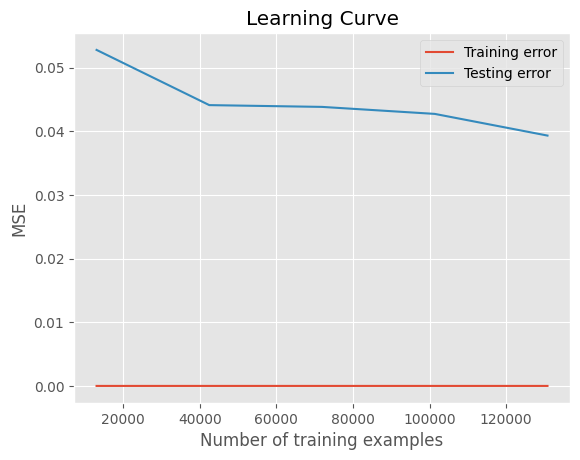

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, train_scores, test_scores = learning_curve(
    dt, x_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, -train_mean, label='Training error')
plt.plot(train_sizes, -test_mean, label='Testing error')
plt.xlabel('Number of training examples')
plt.ylabel('MSE')
plt.legend()
plt.title('Learning Curve')
plt.show()

In [ ]:
# Get numerical feature importances
importances = list(dtr.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: status_Draft         Importance: 0.85
Variable: product_ref_611993   Importance: 0.05
Variable: customer             Importance: 0.02
Variable: quantity tons_log    Importance: 0.02
Variable: width                Importance: 0.01
Variable: thickness_log        Importance: 0.01
Variable: product_ref_640665   Importance: 0.01
Variable: item type_IPL        Importance: 0.0
Variable: item type_Others     Importance: 0.0
Variable: item type_PL         Importance: 0.0
Variable: item type_S          Importance: 0.0
Variable: item type_SLAWR      Importance: 0.0
Variable: item type_W          Importance: 0.0
Variable: item type_WI         Importance: 0.0
Variable: status_Lost          Importance: 0.0
Variable: status_Not lost for AM Importance: 0.0
Variable: status_Offerable     Importance: 0.0
Variable: status_Offered       Importance: 0.0
Variable: status_Revised       Importance: 0.0
Variable: status_To be approved Importance: 0.0
Variable: status_Won           Importance: 0.0
Var

In [ ]:
import pickle                                       # Saving DTR_model as pickel      
with open('DTR_model.pickle', 'wb') as a:
    pickle.dump(dtr, a)

### Converting User input format for Model

In [ ]:
customer = input()
country = input()
status = input()
item_type = input()
application = input()
width = input()
product_ref = input()
quantity_tons = input()
thickness = input()

30349574.0
25.0
Won
PL
28
1210
1668701718
250
40


In [ ]:
dnt = pd.DataFrame({'customer':[float(customer)], 'country':[country], 'status':[status], 'item type':[item_type], 'application':[application], 'width':[float(width)],
                               'product_ref':[int(product_ref)], 'quantity tons_log':[np.log(float(quantity_tons))], 'thickness_log':[np.log(float(thickness))]})
            

In [ ]:
dn = pd.DataFrame({'customer':[30349546.0], 'country':['30.0'], 'status':['Won'], 'item type':['PL'], 'application':['28'], 'width':[1210.0],
       'product_ref':[628377], 'quantity tons_log':[np.log(250)], 'thickness_log':[np.log(40)]})
dn

,customer,country,status,item type,application,width,product_ref,quantity tons_log,thickness_log
0,30349546.0,30.0,Won,PL,28,1210.0,628377,5.521461,3.688879


In [ ]:
dn.columns

Index(['customer', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'quantity tons_log', 'thickness_log'],
      dtype='object')

In [ ]:
dn_one_hot = pd.get_dummies(dn, columns=['application'], prefix='application')
dn_one_hot = pd.get_dummies(dn_one_hot, columns=['country'], prefix='country')
dn_one_hot = pd.get_dummies(dn_one_hot, columns=['status'], prefix='status')
dn_one_hot = pd.get_dummies(dn_one_hot, columns=['product_ref'], prefix='product_ref')
dn_one_hot = pd.get_dummies(dn_one_hot, columns=['item type'], prefix='item type')

dn_one_hot

,customer,width,quantity tons_log,thickness_log,application_28,country_30.0,status_Won,product_ref_628377,item type_PL
0,30349546.0,1210.0,5.521461,3.688879,1,1,1,1,1


In [ ]:
len(X_f.columns)

100

In [ ]:
import pickle
with open('X_f.columns.pickle', 'wb') as a:
    pickle.dump(X_f.columns, a)

In [ ]:
with open('X_f.columns.pickle', 'rb') as a:
    k = pickle.load(a)

In [ ]:
new_data = pd.DataFrame(columns=k)       # Getting all columns of original dataframe
new_data

,customer,width,quantity tons_log,thickness_log,item type_IPL,item type_Others,item type_PL,item type_S,item type_SLAWR,item type_W,...,country_39.0,country_40.0,country_77.0,country_78.0,country_79.0,country_80.0,country_84.0,country_89.0,country_107.0,country_113.0


In [ ]:
new_data.shape

(0, 100)

In [ ]:
new_data = new_data.append(dn_one_hot)              # appending dn_one_hot to new_data
new_data

,customer,width,quantity tons_log,thickness_log,item type_IPL,item type_Others,item type_PL,item type_S,item type_SLAWR,item type_W,...,country_39.0,country_40.0,country_77.0,country_78.0,country_79.0,country_80.0,country_84.0,country_89.0,country_107.0,country_113.0
0,30349546.0,1210.0,5.521461,3.688879,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
new_data.shape

(1, 100)

In [ ]:
new_data = new_data.fillna(0)                         # filling nan values with '0'
new_data

,customer,width,quantity tons_log,thickness_log,item type_IPL,item type_Others,item type_PL,item type_S,item type_SLAWR,item type_W,...,country_39.0,country_40.0,country_77.0,country_78.0,country_79.0,country_80.0,country_84.0,country_89.0,country_107.0,country_113.0
0,30349546.0,1210.0,5.521461,3.688879,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
features = new_data.values

In [ ]:
with open('Scalar.pickle', 'rb') as b:
    l = pickle.load(b)

In [ ]:
new_sample = l.transform(features)

In [ ]:
with open('DTR_model.pickle', 'rb') as c:
    m = pickle.load(c)

In [ ]:
new_pred = m.predict(new_sample)
new_pred

array([6.39359075])

In [ ]:
print('Predicted selling price:', np.exp(new_pred))

Predicted selling price: [598.]


# Status_Prediction

In [127]:
dfu = df

In [128]:
dfu = df[df['status'].isin(['Won', 'Lost'])]
len(dfu)

150437

In [129]:
dfu["status"] = dfu["status"].map({"Won" : 1, "Lost" : 0})

Class 0: 34437
Class 1: 116000
Proportion of class 0 is  22.89 %


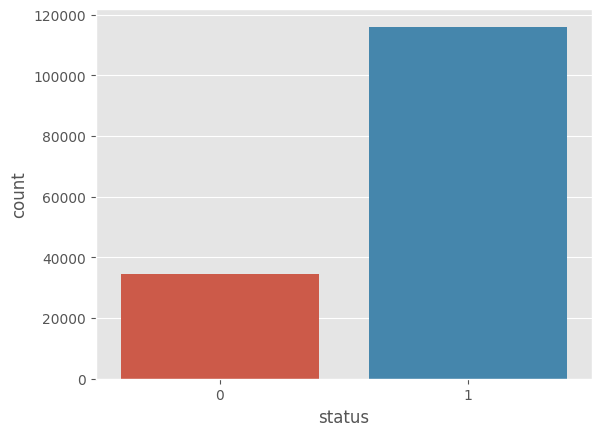

In [139]:
target_count = dfu.status.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')
sns.countplot(x='status', data=dfu)
plt.show()

In [132]:
dfu.columns

Index(['customer', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'quantity tons_log', 'thickness_log',
       'selling_price_log'],
      dtype='object')

In [133]:
num_var = df[[ 'customer', 'width','quantity tons_log', 'thickness_log','selling_price_log']]
cat_var = df[['country', 'status', 'item type', 'application', 'product_ref']]
tar_var = df[['status']]

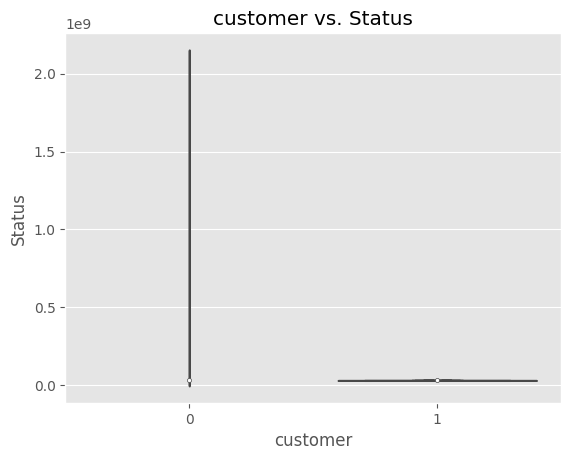

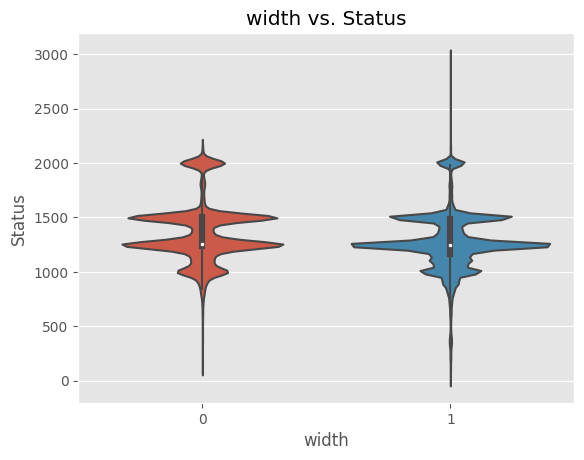

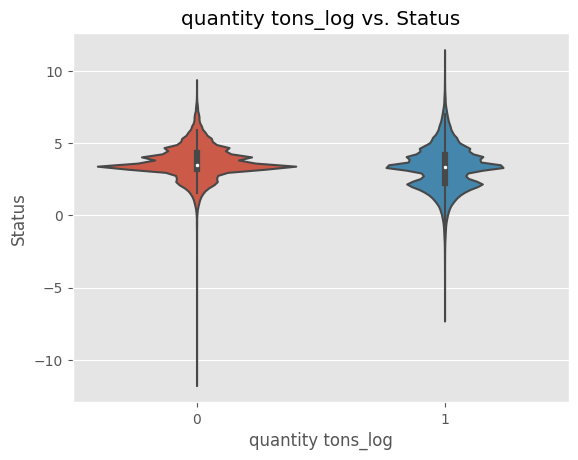

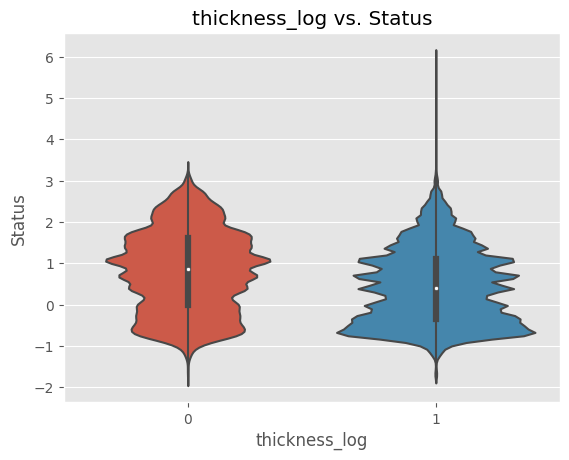

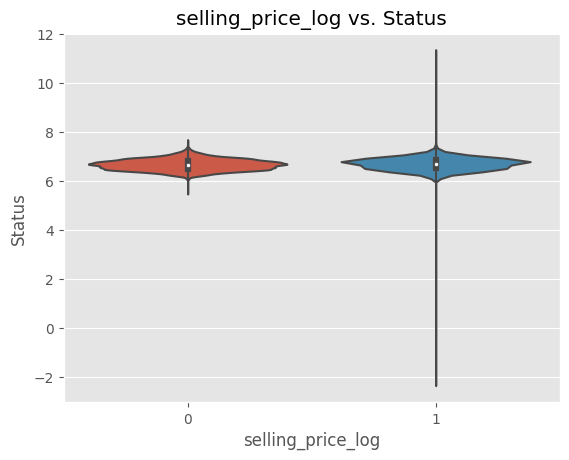

In [145]:
import seaborn as sns

for i in num_var.columns:

    # Create the violin plot using seaborn
    sns.violinplot(x='status', y=i, data=dfu)

    # Add labels and title
    plt.xlabel(f'{i}')
    plt.ylabel('Status')
    plt.title(f'{i} vs. Status')

    # Show the plot
    plt.show()

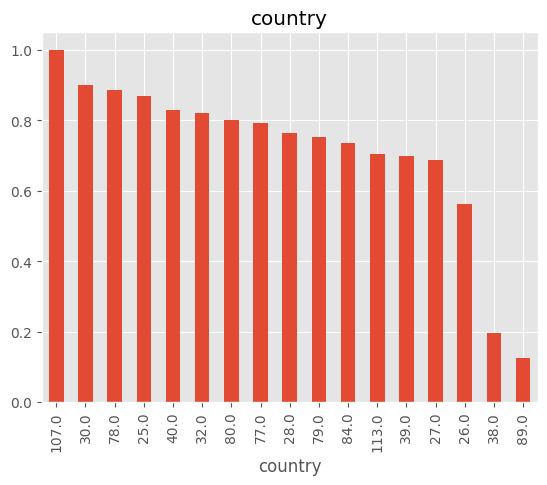

country
107.0    1.000000
30.0     0.900040
78.0     0.886339
25.0     0.868851
40.0     0.829537
32.0     0.822052
80.0     0.801517
77.0     0.792801
28.0     0.764929
79.0     0.753676
84.0     0.737341
113.0    0.704809
39.0     0.697826
27.0     0.687130
26.0     0.562669
38.0     0.195084
89.0     0.125000
Name: status, dtype: float64


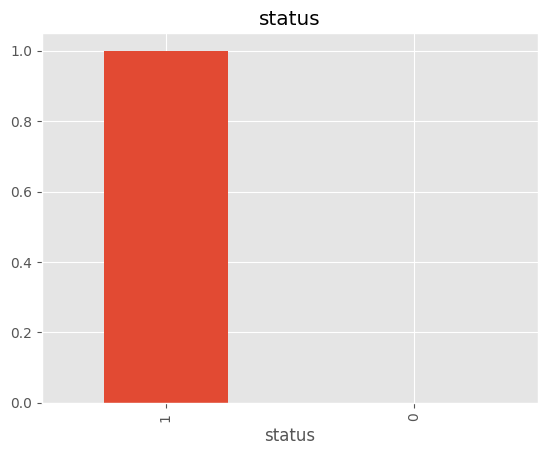

status
1    1.0
0    0.0
Name: status, dtype: float64


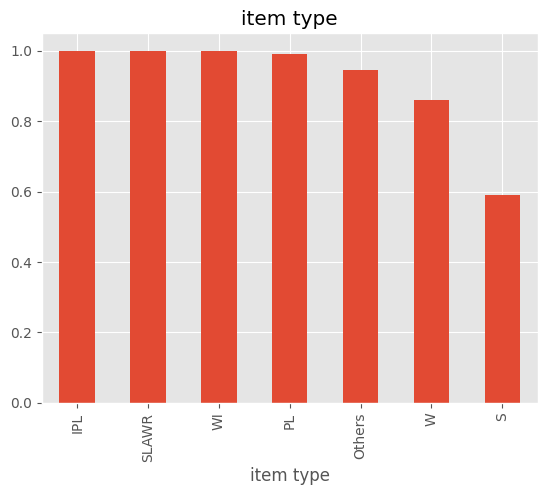

item type
IPL       1.000000
SLAWR     1.000000
WI        1.000000
PL        0.989666
Others    0.943844
W         0.860648
S         0.589311
Name: status, dtype: float64


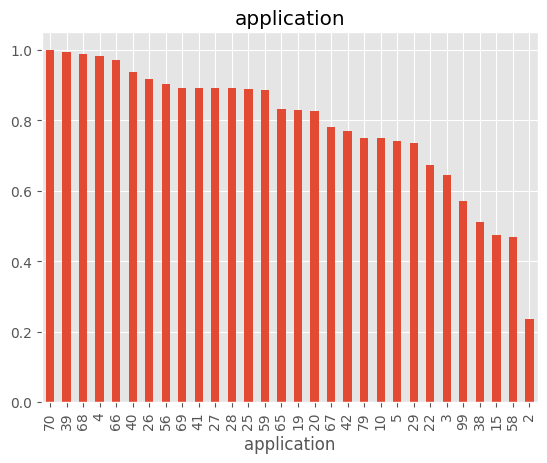

application
70    1.000000
39    0.994652
68    0.988950
4     0.983871
66    0.972464
40    0.937444
26    0.918149
56    0.904302
69    0.892473
41    0.892274
27    0.892171
28    0.891705
25    0.888712
59    0.885193
65    0.832653
19    0.829268
20    0.825480
67    0.781690
42    0.770964
79    0.749737
10    0.749047
5     0.740741
29    0.736582
22    0.672790
3     0.645105
99    0.571429
38    0.510949
15    0.473323
58    0.469565
2     0.235294
Name: status, dtype: float64


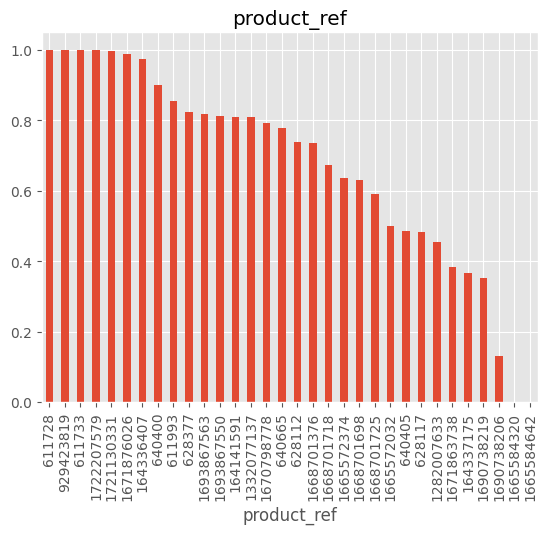

product_ref
611728        1.000000
929423819     1.000000
611733        1.000000
1722207579    1.000000
1721130331    0.995633
1671876026    0.988820
164336407     0.972973
640400        0.901235
611993        0.854546
628377        0.823004
1693867563    0.818182
1693867550    0.812987
164141591     0.810379
1332077137    0.810292
1670798778    0.793324
640665        0.777720
628112        0.738095
1668701376    0.735926
1668701718    0.672577
1665572374    0.637584
1668701698    0.631034
1668701725    0.590909
1665572032    0.500000
640405        0.484696
628117        0.482883
1282007633    0.453202
1671863738    0.384357
164337175     0.366667
1690738219    0.352941
1690738206    0.129771
1665584320    0.000000
1665584642    0.000000
Name: status, dtype: float64


In [135]:
for i in cat_var:
    dfu.groupby(i)['status'].mean().sort_values(ascending=False).plot(kind='bar')
    plt.title(i) # add a title to each plot
    plt.show()  # create a new figure for each plot
    print(dfu.groupby(i)['status'].mean().sort_values(ascending=False))

## Encoding data

In [136]:
dfu = pd.get_dummies(dfu,columns = ["item type"])
dfu = pd.get_dummies(dfu,columns = ["product_ref"])
dfu = pd.get_dummies(dfu,columns = ["application"])
dfu = pd.get_dummies(dfu,columns = ["country"])

In [137]:
df

,customer,country,status,item type,application,width,product_ref,quantity tons_log,thickness_log,selling_price_log
0,30156308.0,28.0,Won,W,10,1500.0,1670798778,3.991779,0.693147,6.749931
1,30202938.0,25.0,Won,W,41,1210.0,1668701718,6.643822,-0.223144,6.953684
2,30153963.0,30.0,Won,WI,28,952.0,628377,5.956169,-0.967584,6.468211
3,30349574.0,32.0,Won,S,59,1317.0,1668701718,5.310301,0.832909,6.643790
4,30211560.0,28.0,Won,W,10,2000.0,640665,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...
181667,30200854.0,25.0,Won,W,41,1240.0,164141591,4.670802,-0.040822,6.400257
181668,30200854.0,25.0,Won,W,41,1220.0,164141591,4.629691,-0.040822,6.381816
181669,30200854.0,25.0,Won,W,41,1500.0,164141591,5.337954,-0.051293,6.378426
181670,30200854.0,25.0,Won,W,41,1250.0,164141591,1.443523,-0.342490,6.428105


In [ ]:
dfu

,customer,status,width,quantity tons_log,thickness_log,selling_price_log,item type_IPL,item type_Others,item type_PL,item type_S,...,country_39.0,country_40.0,country_77.0,country_78.0,country_79.0,country_80.0,country_84.0,country_89.0,country_107.0,country_113.0
0,30156308.0,1,1500.0,3.991779,0.693147,6.749931,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30202938.0,1,1210.0,6.643822,-0.223144,6.953684,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30153963.0,1,952.0,5.956169,-0.967584,6.468211,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30349574.0,1,1317.0,5.310301,0.832909,6.643790,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,30211560.0,1,2000.0,6.666354,1.386294,6.357842,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,30200854.0,1,1240.0,4.670802,-0.040822,6.400257,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181668,30200854.0,1,1220.0,4.629691,-0.040822,6.381816,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181669,30200854.0,1,1500.0,5.337954,-0.051293,6.378426,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181670,30200854.0,1,1250.0,1.443523,-0.342490,6.428105,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Splitting data

In [ ]:
Y_u = dfu['status']  # target varaibles
X_u = dfu.drop('status', axis = 1) # features

In [ ]:
Y = dfu['status'].values    # target varaibles
X = dfu.drop('status', axis = 1).values # features

In [ ]:
# # # Saving feature names for later use
feature_list = list(dfu.drop('status', axis = 1).columns) # feature labels

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
x_train

array([[ 3.01659920e+07,  1.25000000e+03,  4.29279543e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.01991790e+07,  1.50000000e+03,  6.22819665e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.03506300e+07,  1.24000000e+03,  3.22738247e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 3.01992730e+07,  1.21000000e+03,  1.65856081e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.02012230e+07,  1.24500000e+03,  1.33610974e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.02056580e+07,  9.00000000e+02, -5.36256569e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [ ]:
x_train.shape, x_test.shape

((120349, 91), (30088, 91))

In [ ]:
y_train

array([1, 0, 1, ..., 1, 0, 1])

## Scaling data

In [ ]:
from sklearn.preprocessing import StandardScaler

cstd = StandardScaler()
x_train_scaled = cstd.fit_transform(x_train)
x_test_scaled = cstd.transform(x_test)

In [ ]:
import pickle                                 # Saving Scalar as pickle
with open('C_Scalar.pickle', 'wb') as a:
    pickle.dump(cstd, a)

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score       #this will help me to do cross- validation
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
for depth in [1,2,3,4,5,6,7,8,9,10,20,30,40,50,100]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(x_train_scaled, y_train) # the model is trained
  trainAccuracy = accuracy_score(y_train, dt.predict(x_train_scaled)) 
  
  
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, x_train_scaled, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth: ", depth, "Training Accuracy: ", round(trainAccuracy, 4), "Cross val score: ", round(np.mean(valAccuracy), 4))

In [ ]:
dtc = DecisionTreeClassifier(max_depth=20)

# Fit dt to the training set
dtc.fit(x_train_scaled, y_train)

DecisionTreeClassifier(max_depth=20)

In [ ]:
y_pred_dt = dtc.predict(x_test_scaled)
y_pred_dt

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,dtc.predict_proba(x_test_scaled)[:,1])

0.9137437770527561

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("F1 score:", f1_score(y_test, y_pred_dt))
print("auroc:", roc_auc_score(y_test, y_pred_dt))

Accuracy: 0.9113600106354693
F1 score: 0.9429726088908845
auroc: 0.867259438275817


In [ ]:
import numpy as np

y_pred_dt = np.array(y_pred_dt)
count_of_1 = np.count_nonzero(y_pred_dt == 1)
count_of_0 = np.count_nonzero(y_pred_dt == 0)
print(count_of_1, count_of_0)
len(y_pred_dt)

23508 6580


30088

Confusion matrix:
 [[ 5371  1458]
 [ 1209 22050]]


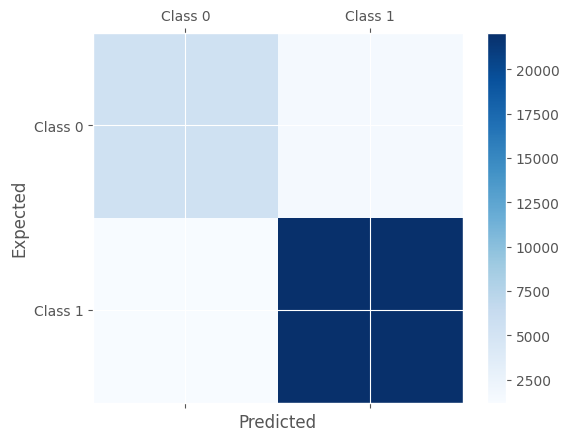

In [ ]:
from sklearn.metrics import confusion_matrix                                    
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_dt)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()   

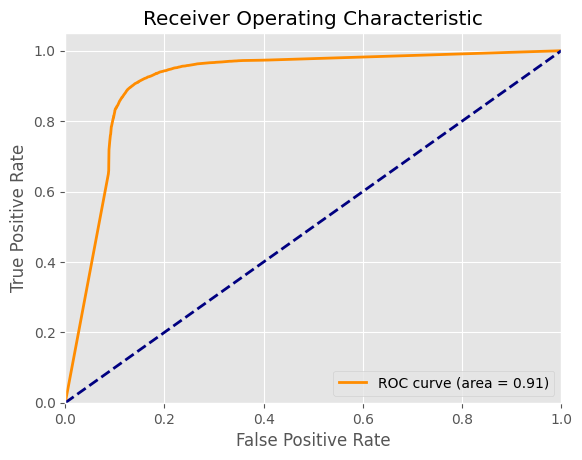

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, dtc.predict_proba(x_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

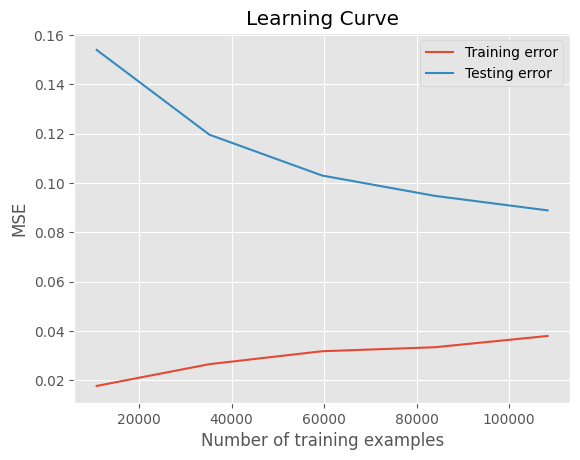

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, train_scores, test_scores = learning_curve(
    dtc, x_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, -train_mean, label='Training error')
plt.plot(train_sizes, -test_mean, label='Testing error')
plt.xlabel('Number of training examples')
plt.ylabel('MSE')
plt.legend()
plt.title('Learning Curve')
plt.show()

In [ ]:
# Get numerical feature importances
importances = list(dtc.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: customer             Importance: 0.16
Variable: selling_price_log    Importance: 0.15
Variable: quantity tons_log    Importance: 0.12
Variable: item type_S          Importance: 0.12
Variable: country_26.0         Importance: 0.07
Variable: thickness_log        Importance: 0.05
Variable: application_15       Importance: 0.04
Variable: width                Importance: 0.03
Variable: application_10       Importance: 0.02
Variable: country_32.0         Importance: 0.02
Variable: item type_W          Importance: 0.01
Variable: product_ref_611993   Importance: 0.01
Variable: product_ref_628377   Importance: 0.01
Variable: product_ref_640665   Importance: 0.01
Variable: product_ref_164141591 Importance: 0.01
Variable: product_ref_1332077137 Importance: 0.01
Variable: product_ref_1668701718 Importance: 0.01
Variable: product_ref_1670798778 Importance: 0.01
Variable: application_25       Importance: 0.01
Variable: application_41       Importance: 0.01
Variable: application_59       Im

In [ ]:
import pickle                                       # Saving DTR_model as pickel      
with open('DTC_model.pickle', 'wb') as a:
    pickle.dump(dtc, a)

In [ ]:
dn = pd.DataFrame({'customer':['30349574.0'], 'country':['25.0'],'selling_price_log':[np.log(696.6169392)], 'item type':['PL'], 'application':[28], 'width':[1210.0],
       'product_ref':[1668701718], 'quantity tons_log':[np.log(250)], 'thickness_log':[np.log(40)]})
dn

,customer,country,selling_price_log,item type,application,width,product_ref,quantity tons_log,thickness_log
0,30349574.0,25.0,6.546236,PL,28,1210.0,1668701718,5.521461,3.688879


In [ ]:
dn_one_hot = pd.get_dummies(dn, columns=['application'], prefix='application')
dn_one_hot = pd.get_dummies(dn_one_hot, columns=['country'], prefix='country')
dn_one_hot = pd.get_dummies(dn_one_hot, columns=['product_ref'], prefix='product_ref')
dn_one_hot = pd.get_dummies(dn_one_hot, columns=['item type'], prefix='item type')

dn_one_hot

,customer,selling_price_log,width,quantity tons_log,thickness_log,application_28,country_25.0,product_ref_1668701718,item type_PL
0,30349574.0,6.546236,1210.0,5.521461,3.688879,1,1,1,1


In [ ]:
import pickle
with open('X_u.columns.pickle', 'wb') as a:
    pickle.dump(X_u.columns, a)

In [ ]:
with open('X_u.columns.pickle', 'rb') as a:
    k = pickle.load(a)

In [ ]:
new_data = pd.DataFrame(columns=k)       # Getting all columns of original dataframe
new_data

,customer,width,quantity tons_log,thickness_log,selling_price_log,item type_IPL,item type_Others,item type_PL,item type_S,item type_SLAWR,...,country_39.0,country_40.0,country_77.0,country_78.0,country_79.0,country_80.0,country_84.0,country_89.0,country_107.0,country_113.0


In [ ]:
new_data.shape

(0, 91)

In [ ]:
new_data = new_data.append(dn_one_hot)              # appending dn_one_hot to new_data
new_data

,customer,width,quantity tons_log,thickness_log,selling_price_log,item type_IPL,item type_Others,item type_PL,item type_S,item type_SLAWR,...,country_39.0,country_40.0,country_77.0,country_78.0,country_79.0,country_80.0,country_84.0,country_89.0,country_107.0,country_113.0
0,30349574.0,1210.0,5.521461,3.688879,6.546236,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
new_data = new_data.fillna(0)                         # filling nan values with '0'
new_data

,customer,width,quantity tons_log,thickness_log,selling_price_log,item type_IPL,item type_Others,item type_PL,item type_S,item type_SLAWR,...,country_39.0,country_40.0,country_77.0,country_78.0,country_79.0,country_80.0,country_84.0,country_89.0,country_107.0,country_113.0
0,30349574.0,1210.0,5.521461,3.688879,6.546236,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
features = new_data.values

In [ ]:
with open('C_Scalar.pickle', 'rb') as b:
    l = pickle.load(b)

In [ ]:
new_sample = l.transform(features)

In [ ]:
with open('DTC_model.pickle', 'rb') as c:
    m = pickle.load(c)

In [ ]:
new_pred = m.predict(new_sample)
new_pred

array([0])

In [ ]:
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Lost
